In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from networkx import *
import random
from scipy.spatial.distance import pdist, squareform
from networkx.algorithms.approximation import min_weighted_dominating_set
from itertools import product  
# from age_calculation import *

# from networkx.algorithms.approximation import dominating_set
from parameters import *
# from create_graph_1 import *
from itertools import combinations
import pickle

%matplotlib inline  


In [2]:
def running_mean(x): #, N = 5):
    N = 100
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

### exp 5 : 8 users under 1 UAV . With no packet loss. State = {t, AoI_UAV, AoI_BS}. sample on generation


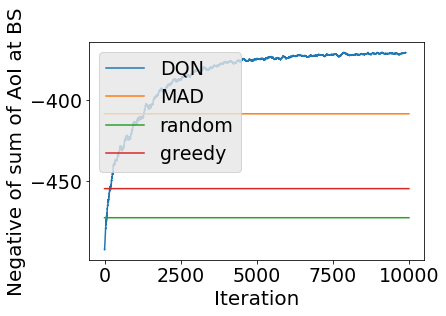

MAD = 408.49564, greedy = 454.87437, DQN = 370.6000061035156, random = 472.89769


In [3]:
# 8 users
path = "/home/biplav/AoI/UAV_results/multi_UAV_Age_7/paper_results/exp5/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


dqn_8U_final = pickle.load(open(path_RP + "8U_dqn_overall.pickle", "rb"))
MAD_8U_final = pickle.load(open(path_RP + "8U_mad_overall.pickle", "rb"))
random_8U_final = pickle.load(open(path_RP + "8U_random_overall.pickle", "rb"))
greedy_8U_final = pickle.load(open(path_RP + "8U_greedy_overall.pickle", "rb"))


dqn_8U_final = dqn_8U_final[8]
MAD_mean_8 = np.mean(MAD_8U_final[8])
random_mean_8_min = np.mean(random_8U_final[8])
random_mean_8_max = np.max(random_8U_final[8])
greedy_mean_8 = np.mean(greedy_8U_final[8])
random_mean_8 = np.mean(random_8U_final[8])



fig, ax1 = plt.subplots()
ax1.plot(running_mean(dqn_8U_final), label = "DQN")
# ax1.plot(running_mean(dqn_8U_final_s2), marker = "D", label = "DQN_s2")
ax1.plot([-MAD_mean_8]*len(dqn_8U_final), label = "MAD")
ax1.plot([-random_mean_8]*len(dqn_8U_final), label = "random")
ax1.plot([-greedy_mean_8]*len(dqn_8U_final), label = "greedy")
ax1.legend()
ax1.tick_params(axis='x', labelsize=19)
ax1.tick_params(axis='y', labelsize=19)
legend = ax1.legend(loc='best', shadow=False, fontsize='19')



legend.get_frame().set_facecolor('0.90')
# ax1.set_title('8 users with 5 UAVs and $e$=0', fontsize='x-large')
plt.show
plt.xlabel('Iteration', fontsize='20')
plt.ylabel('Negative of sum of AoI at BS', fontsize='20')
plt.show()


print(f"MAD = {np.mean(MAD_8U_final[8])}, greedy = {np.mean(greedy_8U_final[8])}, DQN = {-np.mean(dqn_8U_final[-5:])}, random = {np.mean(random_8U_final[8])}")

### exp 6 : 8 users under 1 UAV . With packet loss. State = {t, AoI_UAV, AoI_BS}. sample on generation


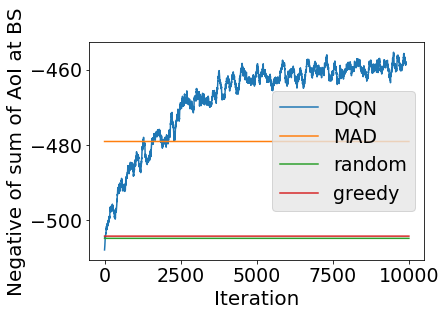

MAD = 479.12311, greedy = 504.26793, DQN = 458.3999938964844, random = 504.85387

DQN sample success =  0.26
DQN update success =  0.62

MAD sample success =  0.17
MAD update success =  0.49

greedy sample success =  0.18
greedy update success =  0.54

random sample success =  0.21
random update success =  0.55


In [4]:
# 8 users
path = "/home/biplav/AoI/UAV_results/multi_UAV_Age_7/paper_results/exp6/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


dqn_8U_final = pickle.load(open(path_RP + "8U_dqn_overall.pickle", "rb"))
MAD_8U_final = pickle.load(open(path_RP + "8U_mad_overall.pickle", "rb"))
random_8U_final = pickle.load(open(path_RP + "8U_random_overall.pickle", "rb"))
greedy_8U_final = pickle.load(open(path_RP + "8U_greedy_overall.pickle", "rb"))


dqn_8U_final = dqn_8U_final[8]
MAD_mean_8 = np.mean(MAD_8U_final[8])
random_mean_8_min = np.mean(random_8U_final[8])
random_mean_8_max = np.max(random_8U_final[8])
greedy_mean_8 = np.mean(greedy_8U_final[8])
random_mean_8 = np.mean(random_8U_final[8])



fig, ax1 = plt.subplots()
ax1.plot(running_mean(dqn_8U_final), label = "DQN")
# ax1.plot(running_mean(dqn_8U_final_s2), marker = "D", label = "DQN_s2")
ax1.plot([-MAD_mean_8]*len(dqn_8U_final), label = "MAD")
ax1.plot([-random_mean_8]*len(dqn_8U_final), label = "random")
ax1.plot([-greedy_mean_8]*len(dqn_8U_final), label = "greedy")
ax1.legend()
ax1.tick_params(axis='x', labelsize=19)
ax1.tick_params(axis='y', labelsize=19)
legend = ax1.legend(loc='best', shadow=False, fontsize='19')



legend.get_frame().set_facecolor('0.90')
# ax1.set_title('8 users with 5 UAVs and $e$=0', fontsize='x-large')
plt.show
plt.xlabel('Iteration', fontsize='20')
plt.ylabel('Negative of sum of AoI at BS', fontsize='20')
plt.show()


print(f"MAD = {np.mean(MAD_8U_final[8])}, greedy = {np.mean(greedy_8U_final[8])}, DQN = {-np.mean(dqn_8U_final[-5:])}, random = {np.mean(random_8U_final[8])}")


## DQN
dqn_attempt_sample_8U = pickle.load(open(path_RP + "8U_dqn_attempt_sample.pickle", "rb"))
dqn_attempt_update_8U = pickle.load(open(path_RP + "8U_dqn_attempt_update.pickle", "rb"))
dqn_success_sample_8U = pickle.load(open(path_RP + "8U_dqn_success_sample.pickle", "rb"))
dqn_success_update_8U = pickle.load(open(path_RP + "8U_dqn_success_update.pickle", "rb"))
print("\nDQN sample success = ", round(np.mean(dqn_success_sample_8U[-5:])/np.mean(dqn_attempt_sample_8U[-5:]),2))
print("DQN update success = ", round(np.mean(dqn_success_update_8U[-5:])/np.mean(dqn_attempt_update_8U[-5:]),2))

## MAD
mad_attempt_sample_8U = pickle.load(open(path_RP + "8U_mad_attempt_sample.pickle", "rb"))
mad_attempt_update_8U = pickle.load(open(path_RP + "8U_mad_attempt_update.pickle", "rb"))
mad_success_sample_8U = pickle.load(open(path_RP + "8U_mad_success_sample.pickle", "rb"))
mad_success_update_8U = pickle.load(open(path_RP + "8U_mad_success_update.pickle", "rb"))
print("\nMAD sample success = ", round(np.mean(mad_success_sample_8U)/np.mean(mad_attempt_sample_8U),2))
print("MAD update success = ", round(np.mean(mad_success_update_8U)/np.mean(mad_attempt_update_8U),2))

## greedy
greedy_attempt_sample_8U = pickle.load(open(path_RP + "8U_greedy_attempt_sample.pickle", "rb"))
greedy_attempt_update_8U = pickle.load(open(path_RP + "8U_greedy_attempt_update.pickle", "rb"))
greedy_success_sample_8U = pickle.load(open(path_RP + "8U_greedy_success_sample.pickle", "rb"))
greedy_success_update_8U = pickle.load(open(path_RP + "8U_greedy_success_update.pickle", "rb"))
print("\ngreedy sample success = ", round(np.mean(greedy_success_sample_8U)/np.mean(greedy_attempt_sample_8U),2))
print("greedy update success = ", round(np.mean(greedy_success_update_8U)/np.mean(greedy_attempt_update_8U),2))

## random
random_attempt_sample_8U = pickle.load(open(path_RP + "8U_random_attempt_sample.pickle", "rb"))
random_attempt_update_8U = pickle.load(open(path_RP + "8U_random_attempt_update.pickle", "rb"))
random_success_sample_8U = pickle.load(open(path_RP + "8U_random_success_sample.pickle", "rb"))
random_success_update_8U = pickle.load(open(path_RP + "8U_random_success_update.pickle", "rb"))
print("\nrandom sample success = ", round(np.mean(random_success_sample_8U)/np.mean(random_attempt_sample_8U),2))
print("random update success = ", round(np.mean(random_success_update_8U)/np.mean(random_attempt_update_8U),2))

### exp 7 : 8,10 users under multiple UAV . With no packet loss. State = {t, AoI_UAV, AoI_BS}. sample on generation


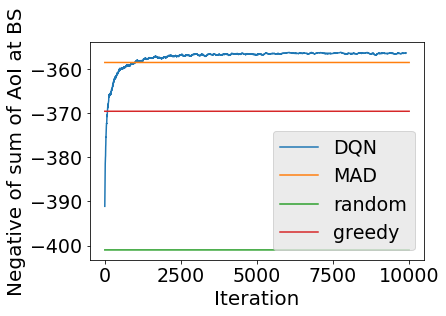

 8 users - MAD = 358.46273, greedy = 369.53108, DQN = 356.0, random = 400.98824


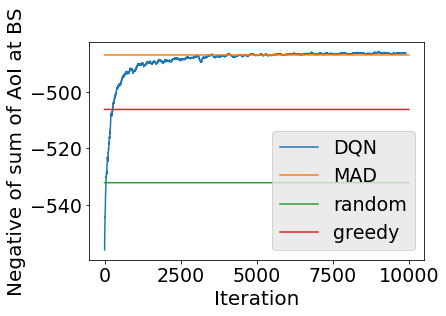

 10 users - MAD = 486.88429, greedy = 506.21953, DQN = 486.79998779296875, random = 532.19328


In [5]:
# 10 users
path = "/home/biplav/AoI/UAV_results/multi_UAV_Age_7/paper_results/exp7/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"

# ##########################################  8 users

dqn_8U_final = pickle.load(open(path_RP + "8U_dqn_overall.pickle", "rb"))
MAD_8U_final = pickle.load(open(path_RP + "8U_mad_overall.pickle", "rb"))
random_8U_final = pickle.load(open(path_RP + "8U_random_overall.pickle", "rb"))
greedy_8U_final = pickle.load(open(path_RP + "8U_greedy_overall.pickle", "rb"))


dqn_8U_final = dqn_8U_final[8]
MAD_mean_8 = np.mean(MAD_8U_final[8])
random_mean_8_min = np.mean(random_8U_final[8])
random_mean_8_max = np.max(random_8U_final[8])
greedy_mean_8 = np.mean(greedy_8U_final[8])
random_mean_8 = np.mean(random_8U_final[8])



fig, ax1 = plt.subplots()
ax1.plot(running_mean(dqn_8U_final), label = "DQN")
# ax1.plot(running_mean(dqn_8U_final_s2), marker = "D", label = "DQN_s2")
ax1.plot([-MAD_mean_8]*len(dqn_8U_final), label = "MAD")
ax1.plot([-random_mean_8]*len(dqn_8U_final), label = "random")
ax1.plot([-greedy_mean_8]*len(dqn_8U_final), label = "greedy")
ax1.legend()
ax1.tick_params(axis='x', labelsize=19)
ax1.tick_params(axis='y', labelsize=19)
legend = ax1.legend(loc='best', shadow=False, fontsize='19')



legend.get_frame().set_facecolor('0.90')
# ax1.set_title('8 users with 5 UAVs and $e$=0', fontsize='x-large')
plt.show
plt.xlabel('Iteration', fontsize='20')
plt.ylabel('Negative of sum of AoI at BS', fontsize='20')
plt.show()


print(f" 8 users - MAD = {np.mean(MAD_8U_final[8])}, greedy = {np.mean(greedy_8U_final[8])}, DQN = {-np.mean(dqn_8U_final[-5:])}, random = {np.mean(random_8U_final[8])}")

# ##########################################  10 users

dqn_10U_final = pickle.load(open(path_RP + "10U_dqn_overall.pickle", "rb"))
MAD_10U_final = pickle.load(open(path_RP + "10U_mad_overall.pickle", "rb"))
random_10U_final = pickle.load(open(path_RP + "10U_random_overall.pickle", "rb"))
greedy_10U_final = pickle.load(open(path_RP + "10U_greedy_overall.pickle", "rb"))


dqn_10U_final = dqn_10U_final[10]
MAD_mean_10 = np.mean(MAD_10U_final[10])
random_mean_10_min = np.mean(random_10U_final[10])
random_mean_10_max = np.max(random_10U_final[10])
greedy_mean_10 = np.mean(greedy_10U_final[10])
random_mean_10 = np.mean(random_10U_final[10])



fig, ax1 = plt.subplots()
ax1.plot(running_mean(dqn_10U_final), label = "DQN")
ax1.plot([-MAD_mean_10]*len(dqn_10U_final), label = "MAD")
ax1.plot([-random_mean_10]*len(dqn_10U_final), label = "random")
ax1.plot([-greedy_mean_10]*len(dqn_10U_final), label = "greedy")
ax1.legend()
ax1.tick_params(axis='x', labelsize=19)
ax1.tick_params(axis='y', labelsize=19)
legend = ax1.legend(loc='best', shadow=False, fontsize='19')



legend.get_frame().set_facecolor('0.90')
# ax1.set_title('10 users with 5 UAVs and $e$=0', fontsize='x-large')
plt.show
plt.xlabel('Iteration', fontsize='20')
plt.ylabel('Negative of sum of AoI at BS', fontsize='20')
plt.show()


print(f" 10 users - MAD = {np.mean(MAD_10U_final[10])}, greedy = {np.mean(greedy_10U_final[10])}, DQN = {-np.mean(dqn_10U_final[-5:])}, random = {np.mean(random_10U_final[10])}")


### exp 8

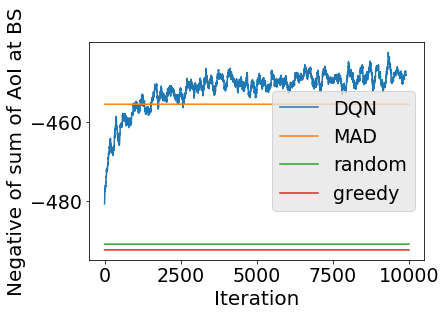

 8 users - MAD = 455.57314, greedy = 492.25163, DQN = 443.20001220703125, random = 490.7887


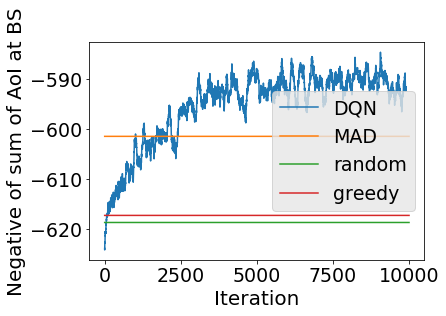

 10 users - MAD = 601.4467, greedy = 617.27214, DQN = 592.0, random = 618.68802


In [6]:
# 8 users
path = "/home/biplav/AoI/UAV_results/multi_UAV_Age_7/paper_results/exp8/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"

# ##########################################  8 users

dqn_8U_final = pickle.load(open(path_RP + "8U_dqn_overall.pickle", "rb"))
MAD_8U_final = pickle.load(open(path_RP + "8U_mad_overall.pickle", "rb"))
random_8U_final = pickle.load(open(path_RP + "8U_random_overall.pickle", "rb"))
greedy_8U_final = pickle.load(open(path_RP + "8U_greedy_overall.pickle", "rb"))


dqn_8U_final = dqn_8U_final[8]
MAD_mean_8 = np.mean(MAD_8U_final[8])
random_mean_8_min = np.mean(random_8U_final[8])
random_mean_8_max = np.max(random_8U_final[8])
greedy_mean_8 = np.mean(greedy_8U_final[8])
random_mean_8 = np.mean(random_8U_final[8])



fig, ax1 = plt.subplots()
ax1.plot(running_mean(dqn_8U_final), label = "DQN")
# ax1.plot(running_mean(dqn_8U_final_s2), marker = "D", label = "DQN_s2")
ax1.plot([-MAD_mean_8]*len(dqn_8U_final), label = "MAD")
ax1.plot([-random_mean_8]*len(dqn_8U_final), label = "random")
ax1.plot([-greedy_mean_8]*len(dqn_8U_final), label = "greedy")
ax1.legend()
ax1.tick_params(axis='x', labelsize=19)
ax1.tick_params(axis='y', labelsize=19)
legend = ax1.legend(loc='best', shadow=False, fontsize='19')



legend.get_frame().set_facecolor('0.90')
# ax1.set_title('8 users with 5 UAVs and $e$=0', fontsize='x-large')
plt.show
plt.xlabel('Iteration', fontsize='20')
plt.ylabel('Negative of sum of AoI at BS', fontsize='20')
plt.show()


print(f" 8 users - MAD = {np.mean(MAD_8U_final[8])}, greedy = {np.mean(greedy_8U_final[8])}, DQN = {-np.mean(dqn_8U_final[-5:])}, random = {np.mean(random_8U_final[8])}")

# ##########################################  10 users

dqn_10U_final = pickle.load(open(path_RP + "10U_dqn_overall.pickle", "rb"))
MAD_10U_final = pickle.load(open(path_RP + "10U_mad_overall.pickle", "rb"))
random_10U_final = pickle.load(open(path_RP + "10U_random_overall.pickle", "rb"))
greedy_10U_final = pickle.load(open(path_RP + "10U_greedy_overall.pickle", "rb"))


dqn_10U_final = dqn_10U_final[10]
MAD_mean_10 = np.mean(MAD_10U_final[10])
random_mean_10_min = np.mean(random_10U_final[10])
random_mean_10_max = np.max(random_10U_final[10])
greedy_mean_10 = np.mean(greedy_10U_final[10])
random_mean_10 = np.mean(random_10U_final[10])



fig, ax1 = plt.subplots()
ax1.plot(running_mean(dqn_10U_final), label = "DQN")
# ax1.plot(running_mean(dqn_10U_final_s2), marker = "D", label = "DQN_s2")
ax1.plot([-MAD_mean_10]*len(dqn_10U_final), label = "MAD")
ax1.plot([-random_mean_10]*len(dqn_10U_final), label = "random")
ax1.plot([-greedy_mean_10]*len(dqn_10U_final), label = "greedy")
ax1.legend()
ax1.tick_params(axis='x', labelsize=19)
ax1.tick_params(axis='y', labelsize=19)
legend = ax1.legend(loc='best', shadow=False, fontsize='19')



legend.get_frame().set_facecolor('0.90')
# ax1.set_title('10 users with 5 UAVs and $e$=0', fontsize='x-large')
plt.show
plt.xlabel('Iteration', fontsize='20')
plt.ylabel('Negative of sum of AoI at BS', fontsize='20')
plt.show()


print(f" 10 users - MAD = {np.mean(MAD_10U_final[10])}, greedy = {np.mean(greedy_10U_final[10])}, DQN = {-np.mean(dqn_10U_final[-5:])}, random = {np.mean(random_10U_final[10])}")




### plot PDR of exp 8


DQN_sample_success =  0.12
DQN_update_success =  0.76

MAD_sample_success =  0.12
MAD_update_success =  0.56

greedy_sample_success =  0.11
greedy_update_success =  0.4

random_sample_success =  0.13
random_update_success =  0.42


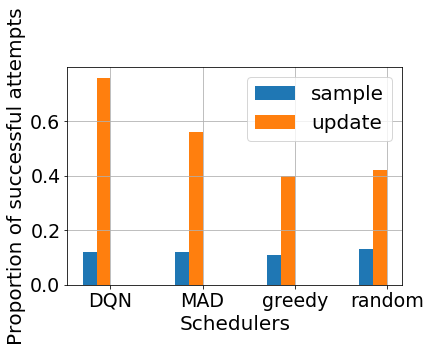

In [7]:
# 8 users
path = "/home/biplav/AoI/UAV_results/multi_UAV_Age_7/paper_results/exp8/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"

## DQN
dqn_attempt_sample_8U = pickle.load(open(path_RP + "8U_dqn_attempt_sample.pickle", "rb"))
dqn_attempt_update_8U = pickle.load(open(path_RP + "8U_dqn_attempt_update.pickle", "rb"))
dqn_success_sample_8U = pickle.load(open(path_RP + "8U_dqn_success_sample.pickle", "rb"))
dqn_success_update_8U = pickle.load(open(path_RP + "8U_dqn_success_update.pickle", "rb"))
DQN_sample_success = round(np.mean(dqn_success_sample_8U[-5:])/np.mean(dqn_attempt_sample_8U[-5:]),2)
DQN_update_success = round(np.mean(dqn_success_update_8U[-5:])/np.mean(dqn_attempt_update_8U[-5:]),2)
print("\nDQN_sample_success = ", DQN_sample_success)
print("DQN_update_success = ", DQN_update_success)

## MAD
mad_attempt_sample_8U = pickle.load(open(path_RP + "8U_mad_attempt_sample.pickle", "rb"))
mad_attempt_update_8U = pickle.load(open(path_RP + "8U_mad_attempt_update.pickle", "rb"))
mad_success_sample_8U = pickle.load(open(path_RP + "8U_mad_success_sample.pickle", "rb"))
mad_success_update_8U = pickle.load(open(path_RP + "8U_mad_success_update.pickle", "rb"))
MAD_sample_success = round(np.mean(mad_success_sample_8U[-5:])/np.mean(mad_attempt_sample_8U[-5:]),2)
MAD_update_success = round(np.mean(mad_success_update_8U[-5:])/np.mean(mad_attempt_update_8U[-5:]),2)
print("\nMAD_sample_success = ", MAD_sample_success)
print("MAD_update_success = ", MAD_update_success)

## greedy
greedy_attempt_sample_8U = pickle.load(open(path_RP + "8U_greedy_attempt_sample.pickle", "rb"))
greedy_attempt_update_8U = pickle.load(open(path_RP + "8U_greedy_attempt_update.pickle", "rb"))
greedy_success_sample_8U = pickle.load(open(path_RP + "8U_greedy_success_sample.pickle", "rb"))
greedy_success_update_8U = pickle.load(open(path_RP + "8U_greedy_success_update.pickle", "rb"))
greedy_sample_success = round(np.mean(greedy_success_sample_8U[-5:])/np.mean(greedy_attempt_sample_8U[-5:]),2)
greedy_update_success = round(np.mean(greedy_success_update_8U[-5:])/np.mean(greedy_attempt_update_8U[-5:]),2)
print("\ngreedy_sample_success = ", greedy_sample_success)
print("greedy_update_success = ", greedy_update_success)

## random
random_attempt_sample_8U = pickle.load(open(path_RP + "8U_random_attempt_sample.pickle", "rb"))
random_attempt_update_8U = pickle.load(open(path_RP + "8U_random_attempt_update.pickle", "rb"))
random_success_sample_8U = pickle.load(open(path_RP + "8U_random_success_sample.pickle", "rb"))
random_success_update_8U = pickle.load(open(path_RP + "8U_random_success_update.pickle", "rb"))
random_sample_success = round(np.mean(random_success_sample_8U[-5:])/np.mean(random_attempt_sample_8U[-5:]),2)
random_update_success = round(np.mean(random_success_update_8U[-5:])/np.mean(random_attempt_update_8U[-5:]),2)
print("\nrandom_sample_success = ", random_sample_success)
print("random_update_success = ", random_update_success)


fig, ax = plt.subplots()
barWidth = 0.15
 
sample =    [DQN_sample_success, MAD_sample_success, greedy_sample_success, random_sample_success] # 100, 150, 200, 250
update =    [DQN_update_success, MAD_update_success, greedy_update_success, random_update_success] # 100, 150, 200, 250

  
N = 4 ## number of elements per scheduler, here 2
ind = np.arange(N)    # the x locations for the groups
width = 0.15         # the width of the bars

p1 = ax.bar(ind, sample, width, bottom=0)
p2 = ax.bar(ind + width, update, width, bottom=0)
# p3 = ax.bar(ind + 2*width, greedy, width, bottom=0)
# p4 = ax.bar(ind + 3*width, random, width, bottom=0)


# ax.set_title('Scalability Analysis')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('DQN', 'MAD', 'greedy','random')) #, '250'))
ax.tick_params(axis='x', labelsize=19)
ax.tick_params(axis='y', labelsize=19)


ax.legend((p1[0], p2[0]), ('sample', 'update'), fontsize=20, loc='top right')
# ax.legend(loc='best')
plt.xlabel('Schedulers', fontsize=20)
plt.ylabel('Proportion of successful attempts', fontsize=20)
plt.grid('True')